In [14]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import the dataset
Startups = pd.read_csv(r'D:\Caroline\Documents\Graduate\ISE 530 Optimizaton for Analytics\50_Startups_multi.csv')
print(Startups)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [15]:
#replace all zeros with NaN values
Startups.replace(0.00, np.nan, inplace=True)
print(Startups)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [16]:
Startups['R&D Spend'] = Startups['R&D Spend'].fillna(Startups['R&D Spend'].mean())
Startups['Marketing Spend'] = Startups['Marketing Spend'].fillna(Startups['Marketing Spend'].mean())
print(Startups)

        R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.200000       136897.80    471784.100000    New York  192261.83
1   162597.700000       151377.59    443898.530000  California  191792.06
2   153441.510000       101145.55    407934.540000     Florida  191050.39
3   144372.410000       118671.85    383199.620000    New York  182901.99
4   142107.340000        91391.77    366168.420000     Florida  166187.94
5   131876.900000        99814.71    362861.360000    New York  156991.12
6   134615.460000       147198.87    127716.820000  California  156122.51
7   130298.130000       145530.06    323876.680000     Florida  155752.60
8   120542.520000       148718.95    311613.290000    New York  152211.77
9   123334.880000       108679.17    304981.620000  California  149759.96
10  101913.080000       110594.11    229160.950000     Florida  146121.95
11  100671.960000        91790.61    249744.550000  California  144259.40
12   93863.750000       127320.38    2

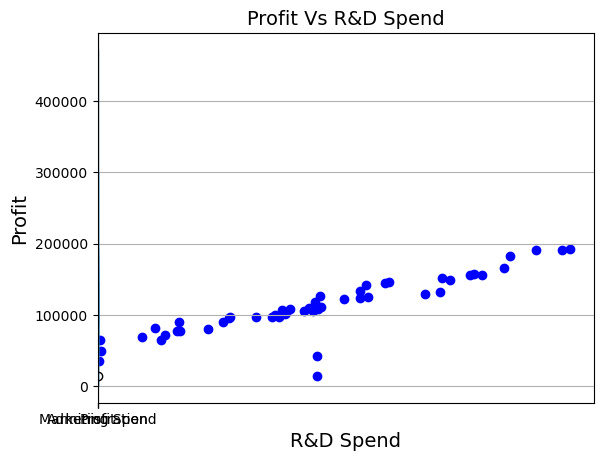

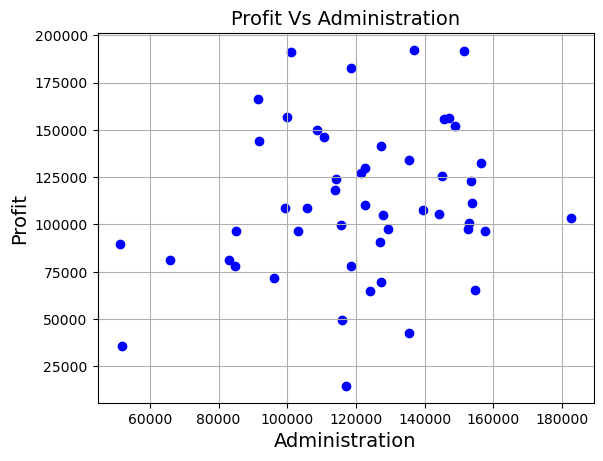

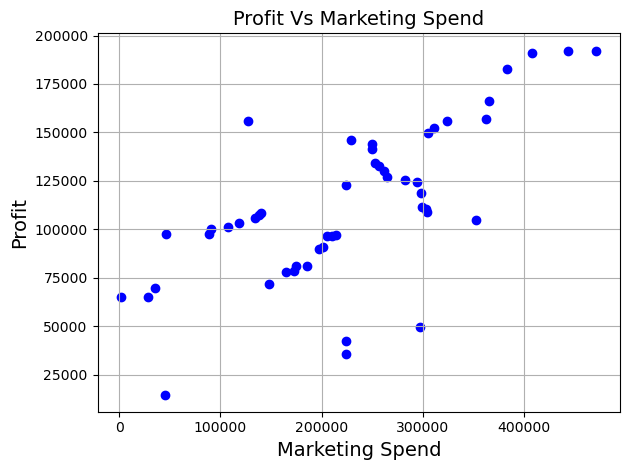

In [17]:
# Check the Linearity
plt.scatter(Startups['R&D Spend'], Startups['Profit'], color='blue')
plt.title('Profit Vs R&D Spend', fontsize=14)
plt.xlabel('R&D Spend', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(Startups['Administration'], Startups['Profit'], color='blue')
plt.title('Profit Vs Administration', fontsize=14)
plt.xlabel('Administration', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(Startups['Marketing Spend'], Startups['Profit'], color='blue')
plt.title('Profit Vs Marketing Spend', fontsize=14)
plt.xlabel('Marketing Spend', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
## Encoding the categorical data
# One hot encoding with State
from sklearn.preprocessing import OneHotEncoder
Startups2 = Startups
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'Country' column 
encoder_df = pd.DataFrame(encoder.fit_transform(Startups[['State']]).toarray())

#merge one-hot encoded columns back with original DataFrame
Startups2 = Startups2.join(encoder_df)

print(Startups2.head(10)) # California-0, Florida-1, New York- 2

   R&D Spend  Administration  Marketing Spend       State     Profit    0  \
0  165349.20       136897.80        471784.10    New York  192261.83  0.0   
1  162597.70       151377.59        443898.53  California  191792.06  1.0   
2  153441.51       101145.55        407934.54     Florida  191050.39  0.0   
3  144372.41       118671.85        383199.62    New York  182901.99  0.0   
4  142107.34        91391.77        366168.42     Florida  166187.94  0.0   
5  131876.90        99814.71        362861.36    New York  156991.12  0.0   
6  134615.46       147198.87        127716.82  California  156122.51  1.0   
7  130298.13       145530.06        323876.68     Florida  155752.60  0.0   
8  120542.52       148718.95        311613.29    New York  152211.77  0.0   
9  123334.88       108679.17        304981.62  California  149759.96  1.0   

     1    2  
0  0.0  1.0  
1  0.0  0.0  
2  1.0  0.0  
3  0.0  1.0  
4  1.0  0.0  
5  0.0  1.0  
6  0.0  0.0  
7  1.0  0.0  
8  0.0  1.0  
9  0.0  0.0 

In [19]:
#drop 'State' column
Startups3 = Startups2
Startups3.drop('State', axis=1, inplace=True)
Startups3.columns = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'California','Florida','New York']
print(Startups3.head(10))

   R&D Spend  Administration  Marketing Spend     Profit  California  Florida  \
0  165349.20       136897.80        471784.10  192261.83         0.0      0.0   
1  162597.70       151377.59        443898.53  191792.06         1.0      0.0   
2  153441.51       101145.55        407934.54  191050.39         0.0      1.0   
3  144372.41       118671.85        383199.62  182901.99         0.0      0.0   
4  142107.34        91391.77        366168.42  166187.94         0.0      1.0   
5  131876.90        99814.71        362861.36  156991.12         0.0      0.0   
6  134615.46       147198.87        127716.82  156122.51         1.0      0.0   
7  130298.13       145530.06        323876.68  155752.60         0.0      1.0   
8  120542.52       148718.95        311613.29  152211.77         0.0      0.0   
9  123334.88       108679.17        304981.62  149759.96         1.0      0.0   

   New York  
0       1.0  
1       0.0  
2       0.0  
3       1.0  
4       0.0  
5       1.0  
6       0.

In [20]:
# Split the dataset (Profit is the dependant variable)
training_data = Startups3.sample(frac=0.8, random_state=25)
testing_data = Startups3.drop(training_data.index)
print(training_data.head(10))
print(testing_data)


    R&D Spend  Administration  Marketing Spend     Profit  California  \
36   28663.76       127056.21        201126.82   90708.19         0.0   
46    1315.46       115816.21        297114.46   49490.75         0.0   
7   130298.13       145530.06        323876.68  155752.60         0.0   
41   27892.92        84710.77        164470.71   77798.83         0.0   
17   94657.16       145077.58        282574.31  125370.37         0.0   
14  119943.24       156547.42        256512.92  132602.65         0.0   
34   46426.07       157693.92        210797.67   96712.80         1.0   
33   55493.95       103057.49        214634.81   96778.92         0.0   
45    1000.23       124153.04          1903.93   64926.08         0.0   
39   38558.51        82982.09        174999.30   81005.76         1.0   

    Florida  New York  
36      1.0       0.0  
46      1.0       0.0  
7       1.0       0.0  
41      1.0       0.0  
17      0.0       1.0  
14      1.0       0.0  
34      0.0       0.0  
33  

In [21]:
Xtrain = training_data[['R&D Spend','Administration','Marketing Spend','California','Florida','New York']]
Ytrain = training_data['Profit']
print(Xtrain.head(10))
print("The train of Profit is:",Ytrain)
Xtest = testing_data[['R&D Spend','Administration','Marketing Spend','California','Florida','New York']]
Ytest = testing_data['Profit'].values.reshape(-1, 1)
print(Xtest)
print("The test of Profit is:", Ytest)


    R&D Spend  Administration  Marketing Spend  California  Florida  New York
36   28663.76       127056.21        201126.82         0.0      1.0       0.0
46    1315.46       115816.21        297114.46         0.0      1.0       0.0
7   130298.13       145530.06        323876.68         0.0      1.0       0.0
41   27892.92        84710.77        164470.71         0.0      1.0       0.0
17   94657.16       145077.58        282574.31         0.0      0.0       1.0
14  119943.24       156547.42        256512.92         0.0      1.0       0.0
34   46426.07       157693.92        210797.67         1.0      0.0       0.0
33   55493.95       103057.49        214634.81         0.0      1.0       0.0
45    1000.23       124153.04          1903.93         0.0      0.0       1.0
39   38558.51        82982.09        174999.30         1.0      0.0       0.0
The train of Profit is: 36     90708.19
46     49490.75
7     155752.60
41     77798.83
17    125370.37
14    132602.65
34     96712.80
33    

In [22]:
from sklearn import linear_model
Mregr = linear_model.LinearRegression()
Mregr.fit(Xtrain, Ytrain)

print('Intercept: \n', Mregr.intercept_)
print('Coefficients: \n', Mregr.coef_)

Intercept: 
 59425.299047170905
Coefficients: 
 [ 8.42702224e-01 -8.33051800e-02  1.76078648e-03 -2.81571023e+03
  2.00361210e+03  8.12098130e+02]


In [23]:
# Prediction
Y_test_pred=Mregr.predict(Xtest)
Pred_df = pd.DataFrame({'Actual': Ytest.flatten(), 'Predicted': Y_test_pred.flatten()})
print(Pred_df)

      Actual      Predicted
0  166187.94  174214.419143
1  152211.77  149978.472420
2  129917.04  146993.012128
3  108733.99  110065.748433
4  107404.34   99720.105342
5  105733.54  113137.477212
6  103282.38  102083.386446
7   97483.56   99191.633099
8   65200.33   62452.557672
9   14681.40  111657.698885


In [24]:
# Evaluation
from sklearn.metrics import r2_score
r_squared = r2_score(Ytest, Y_test_pred)
r_squared

0.3973181418808027